<a href="https://colab.research.google.com/github/Deivanai-Subramanian/Web-App-for-Cardiovascular-Disease-Diagnosing-Using-Data-Science/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [15]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from prettytable import PrettyTable


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle
import json
import joblib

# Reading the Datasets

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PredictionDataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Visualizing the Datasets

In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Check null values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
# Percentage of patients have and do not have heart disease
df['target'].value_counts()/df.shape[0]*100 

1    51.317073
0    48.682927
Name: target, dtype: float64

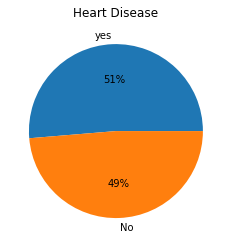

In [ ]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

#Attributes Correlation 




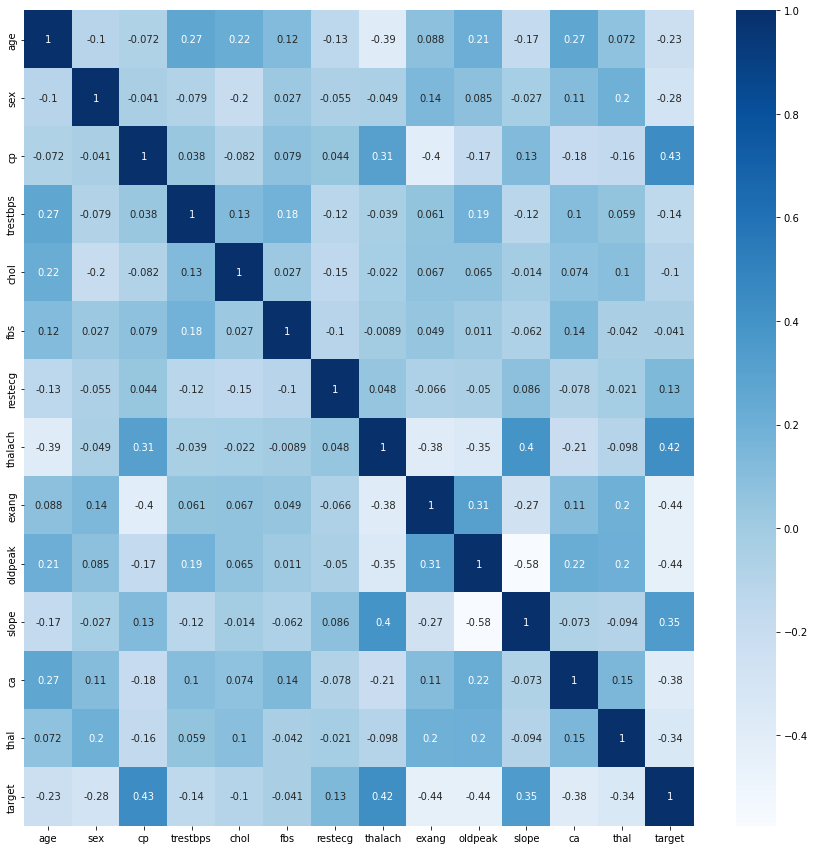

In [ ]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

# Age Exploration

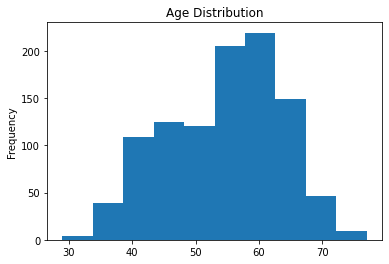

In [ ]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [ ]:
# Get min, max and average of the age
print('Min age: ', min(df['age']))
print('Max age: ', max(df['age']))
print('Average age: ', df['age'].mean())


Min age:  29
Max age:  77
Average age:  54.43414634146342


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



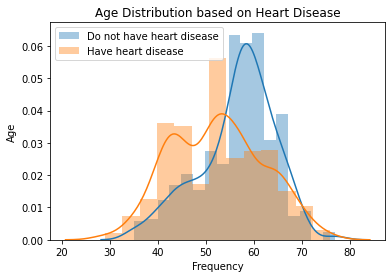

In [ ]:
# Display age distribution based on heart disease
sns.distplot(df[df['target'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df[df['target'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [4]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who do not have heart disease: ', min(df[df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(df[df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', df[df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.569138276553105


In [5]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who have heart disease: ', min(df[df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(df[df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', df[df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  29
Max age of people who have heart disease:  76
Average age of people who have heart disease:  52.40874524714829


# Gender Exploration


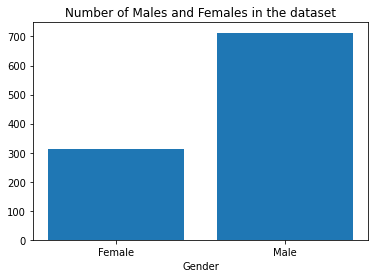

In [ ]:
# Number of males and females
F = df[df['sex'] == 0].count()['target']
M = df[df['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

# Chest Pain Type Exploration

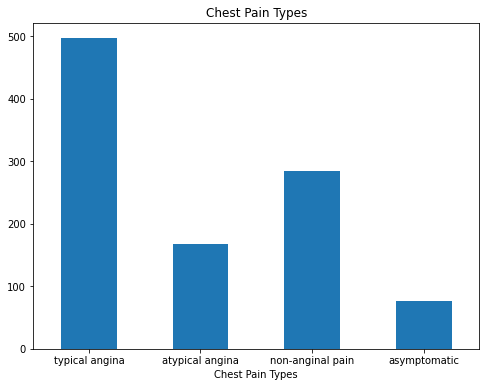

In [ ]:
# Display chest pain types in bar chart
df.groupby(df['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()


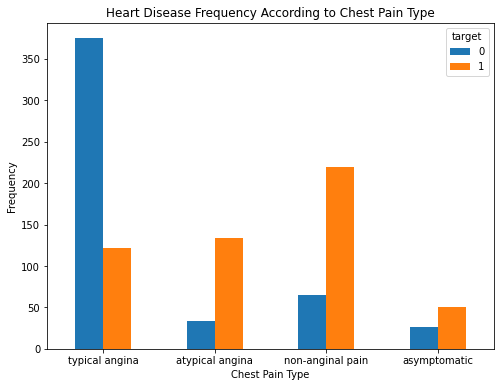

In [ ]:
# Display chest pain types based on the target
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

# Blood Pressure Exploration


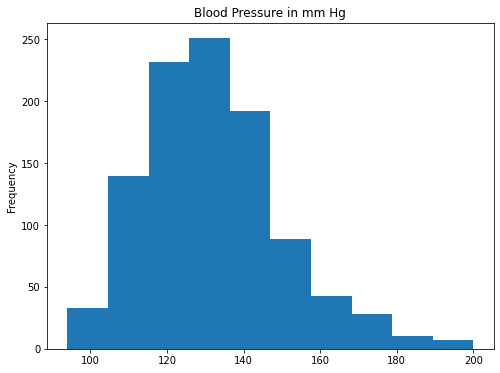

In [ ]:
# Display blood pressure distribution
df['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



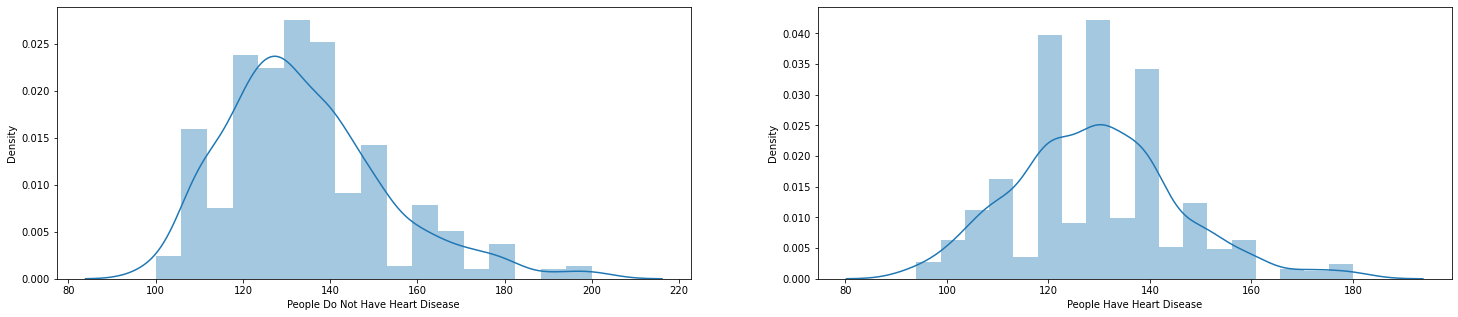

In [ ]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(df[df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', df[df['target'] == 0]['trestbps'].mean())


Min blood pressure of people who do not have heart disease:  100
Max blood pressure of people who do not have heart disease:  200
Average blood pressure of people who do not have heart disease:  134.1062124248497


In [ ]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(df[df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(df[df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', df[df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  180
Average blood pressure of people who have heart disease:  129.24524714828897


# Cholestoral Exploration

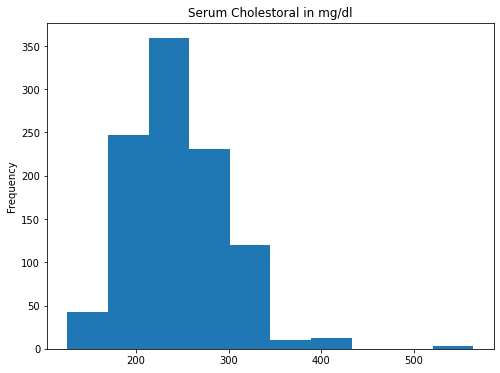

In [ ]:
# Display Cholestoral distribution
df['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



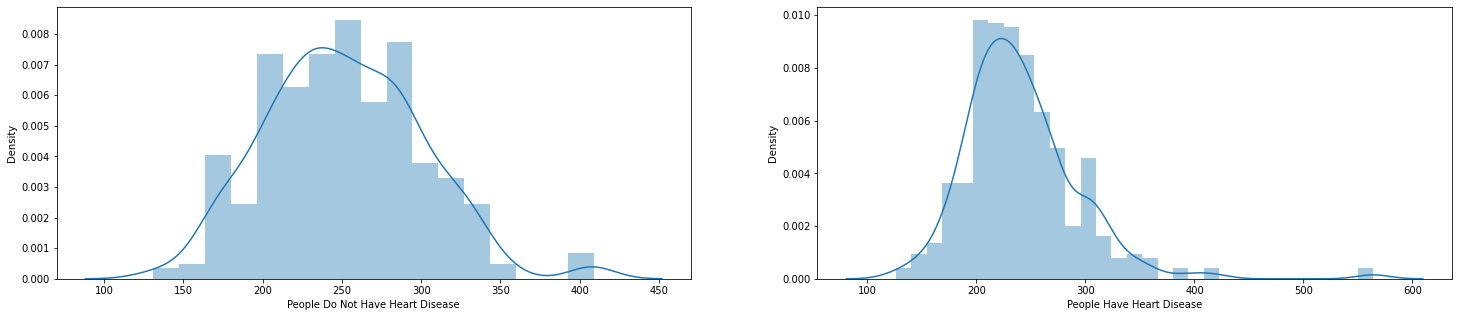

In [ ]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()


In [ ]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(df[df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(df[df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', df[df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  131
Max cholestoral of people who do not have heart disease:  409
Average cholestoral of people who do not have heart disease:  251.2925851703407


In [ ]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(df[df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(df[df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', df[df['target'] == 1]['chol'].mean())


Min cholestoral of people who have heart disease:  126
Max cholestoral of people who have heart disease:  564
Average cholestorale of people who have heart disease:  240.97908745247148


# Fasting Blood Sugar Exploration


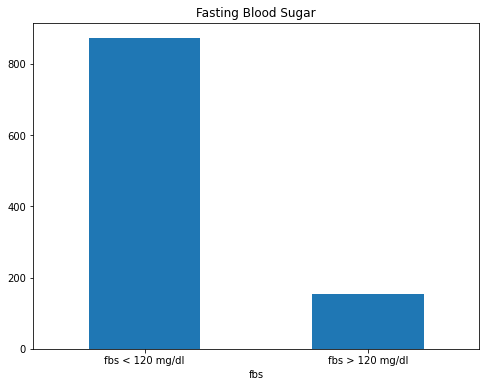

In [ ]:
# Display fasting blood sugar in bar chart
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

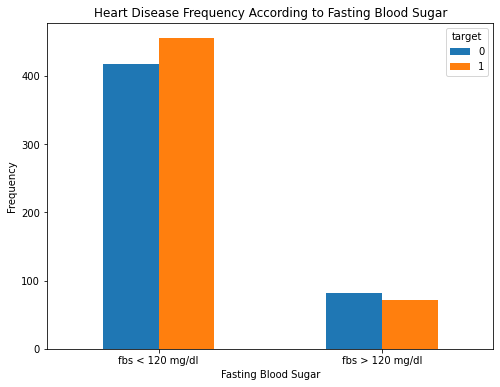

In [ ]:
# Display fasting blood sugar based on the target
pd.crosstab(df.fbs,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

# Electrocardiographic Results Exploration


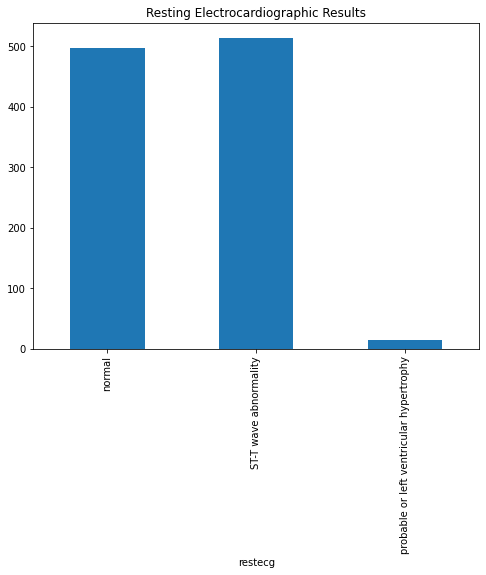

In [ ]:
# Display electrocardiographic results in bar chart
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

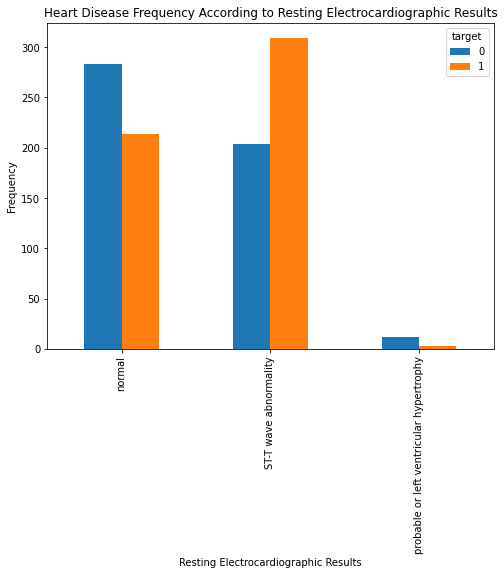

In [ ]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.restecg,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()


# Maximum Heart Rate Exploration

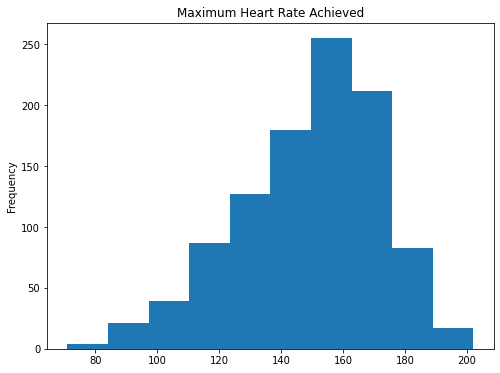

In [ ]:
# Display maximum heart rate distribution
df['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



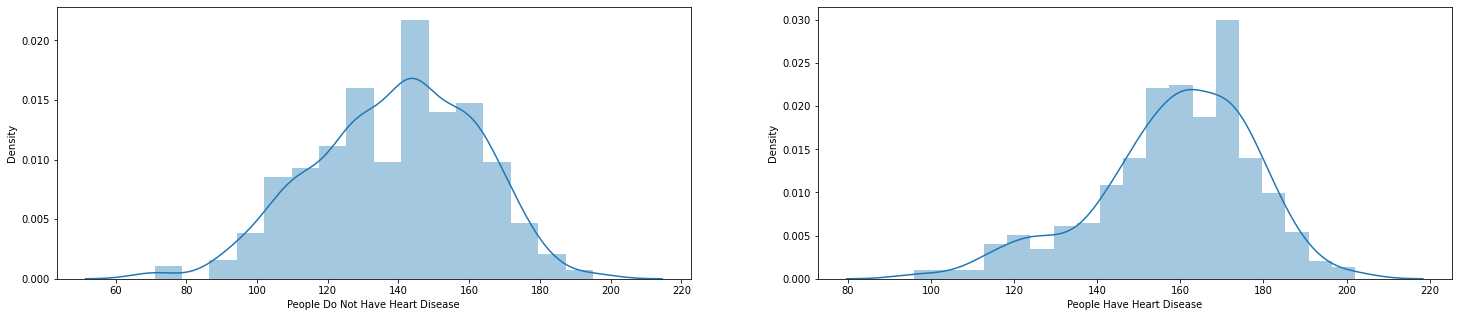

In [ ]:
# Display maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()


In [ ]:
# Get min, max and average of the maximum heart rate of the people do not have heart diseas
print('Min resting blood pressure of people who do not have heart disease: ', min(df[df['target'] == 0]['thalach']))
print('Max resting blood pressure of people who do not have heart disease: ', max(df[df['target'] == 0]['thalach']))
print('Average resting blood pressure of people who do not have heart disease: ', df[df['target'] == 0]['thalach'].mean())

Min resting blood pressure of people who do not have heart disease:  71
Max resting blood pressure of people who do not have heart disease:  195
Average resting blood pressure of people who do not have heart disease:  139.1302605210421


In [ ]:
# Get min, max and average of the maximum heart rate of the people have heart diseas
print('Min maximum heart rate  of people who have heart disease: ', min(df[df['target'] == 1]['thalach']))
print('Max maximum heart rate people who have heart disease: ', max(df[df['target'] == 1]['thalach']))
print('Average maximum heart rate of people who have heart disease: ', df[df['target'] == 1]['thalach'].mean())


Min maximum heart rate  of people who have heart disease:  96
Max maximum heart rate people who have heart disease:  202
Average maximum heart rate of people who have heart disease:  158.58555133079847


# Exercise Induced Angina Exploration


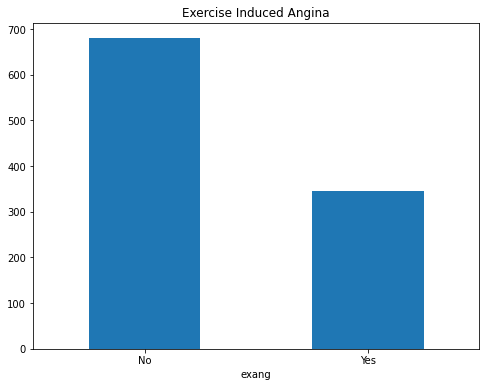

In [ ]:
# Display exercise induced angina in bar chart
df.groupby(df['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()


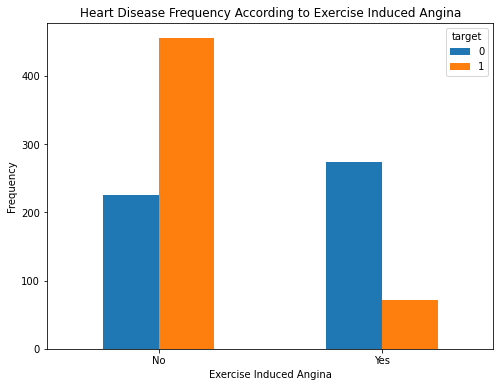

In [ ]:
# Display exercise induced angina based on the target
pd.crosstab(df.exang,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

# ST depression Exploration


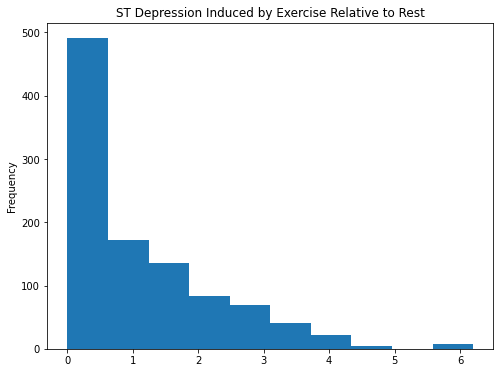

In [ ]:
# Display ST depression induced by exercise relative to rest distribution
df['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



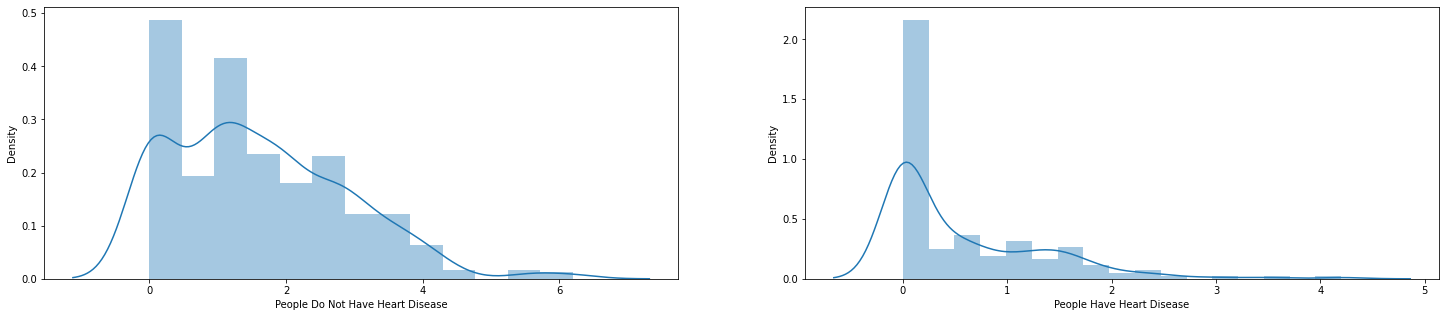

In [ ]:
# Display ST depression distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()


In [ ]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(df[df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(df[df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', df[df['target'] == 0]['oldpeak'].mean())


Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  6.2
Average ST depression of people who do not have heart disease:  1.6002004008016033


In [ ]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(df[df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(df[df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', df[df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  4.2
Average ST depression of people not have heart disease:  0.5699619771863118


# Slope Exploration

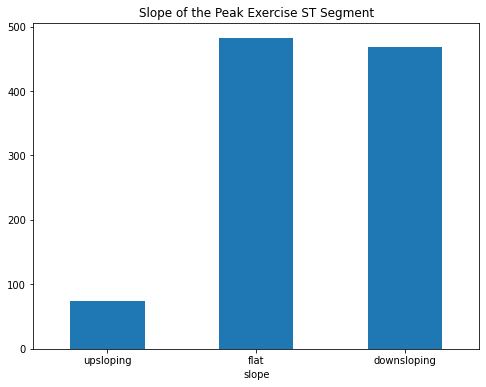

In [ ]:
# Display slope of the peak exercise ST segment in bar chart
df.groupby(df['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()


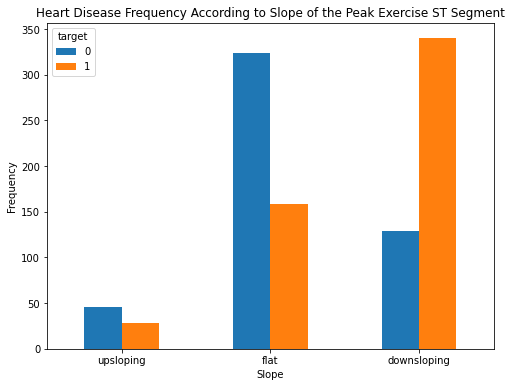

In [ ]:
# Display slope of the peak exercise ST segment based on the target
pd.crosstab(df.slope,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()


# Major Vessels Exploration

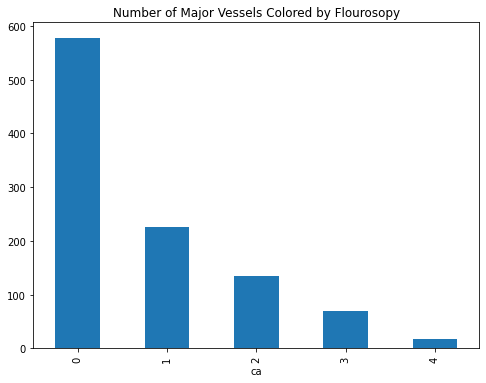

In [ ]:
# Display number of major vessels in bar chart
df.groupby(df['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', 
                                            figsize = (8, 6))
plt.show()

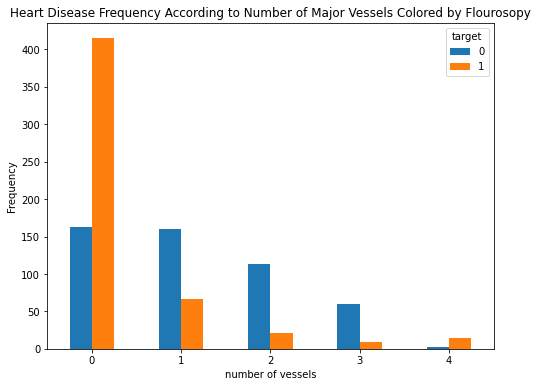

In [ ]:
# Display number of vessels based on the target
pd.crosstab(df.ca,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

# Thalassemia Exploration


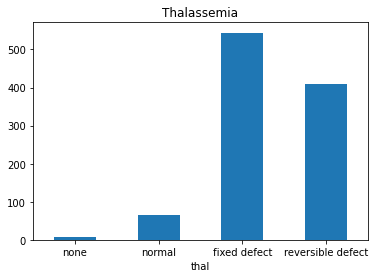

In [ ]:
# Display thalassemia in bar chart
df.groupby(df['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(4), ('none','normal','fixed defect','reversible defect'), rotation = 0)
plt.show()


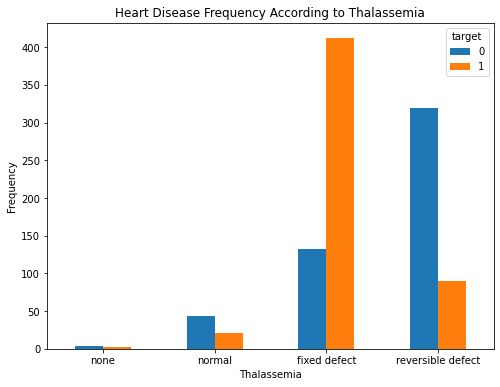

In [ ]:
pd.crosstab(df.thal,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(4), ( 'none', 'normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

# The correlation between heart disease, cp and exang


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



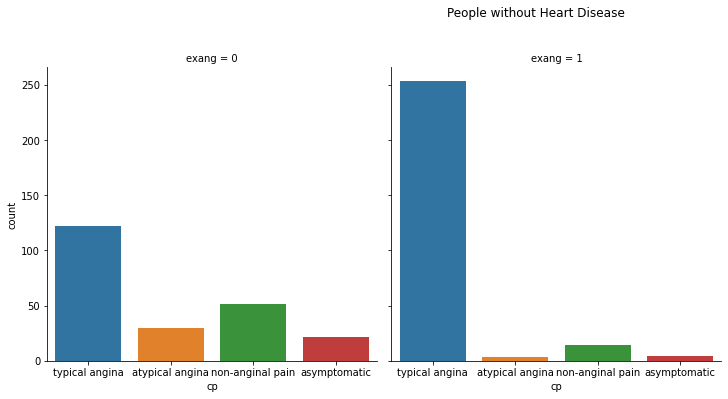

In [ ]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 0], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People without Heart Disease', y = 1.1)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



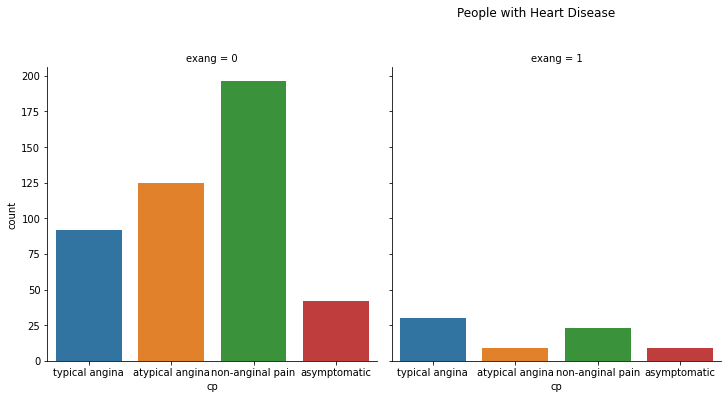

In [ ]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 1], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People with Heart Disease', y = 1.1)
plt.show()


# The correlation between oldpeak, slope and target

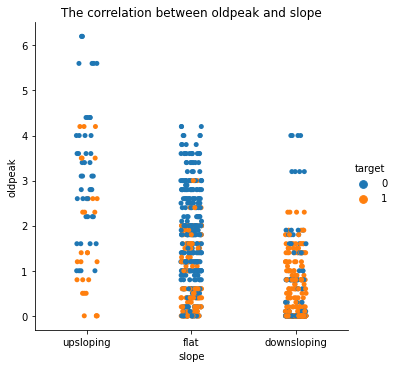

In [ ]:
sns.catplot(x = "slope", y = "oldpeak", hue = "target", data = df)
plt.title('The correlation between oldpeak and slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

# The correlation between ca and age


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



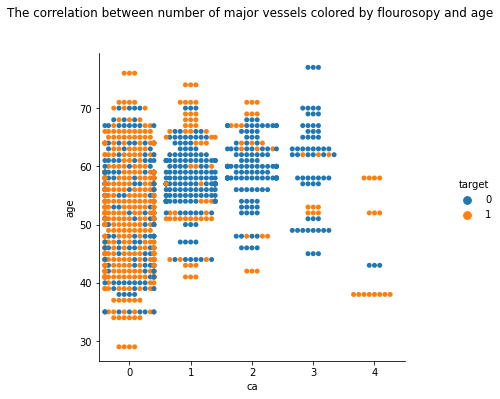

In [ ]:
g = sns.catplot(x = 'ca', y = 'age', hue = 'target', data = df, kind="swarm")
g.fig.suptitle('The correlation between number of major vessels colored by flourosopy and age', y = 1.1)
plt.show()

# The correlation between age and thalach


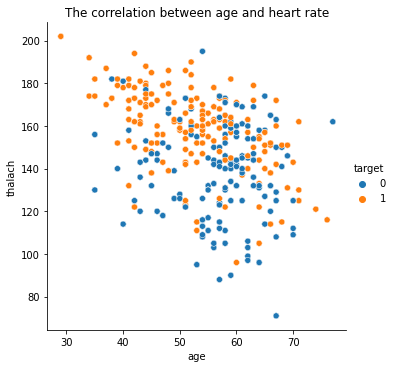

In [ ]:
sns.relplot(x = 'age', y = 'thalach', data = df, hue = 'target', legend="full")
plt.title('The correlation between age and heart rate')
plt.show()


#ML Modeling

# Prepare Data for Machine Learning


In [9]:
# Initialize data and target
features = df.drop(['target'], axis = 1)
target = df['target']

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 0)


Here, I will use the below machine learning algorithms then I will select the best one based on its classification report.

* Logistic Regression (Supervised learning – Classification)
* Support Vector Machine Algorithm (Supervised Learning - Classification)
* Decision Trees (Supervised Learning – Classification/Regression)
* Random Forests (Supervised Learning – Classification/Regression)
* K Nearest Neighbours (Supervised Learning)
* Ada Boost
* Gradient Boosting









# Train and Evaluate Models


In [6]:
# Train and evaluate model
def print_score(cls, X_train, y_train, X_test, y_test, train=True):

    """
    Function: train and evaluate a machine learning classifier.
    Args:
      cls: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """ 

    if train:
        pred = cls.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = cls.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [10]:
# Initialize the models
lgr = LogisticRegression(random_state = 2, max_iter=1000)
sv = SVC(random_state = 1)
dt = DecisionTreeClassifier(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 20)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)

ml_algo_name = ['LOGISTIC REGRESSION','SUPPORT VECTOR CLASSIFIER','DECISION TREE','RANDOM FOREST CLASSIFIER','K NEAREST NEIGHBOURS','ADABOOST CLASSIFIER','GRADIENT BOOOSTING CLASSIFIER']
i = 0;

# Fit and evaluate models
for cls in [lgr ,sv ,dt ,rf ,knn ,ab ,gb ]:
    print(ml_algo_name[i])
    print()
    i = i+1
    cls.fit(X_train, y_train)
    print_score(cls, X_train, y_train, X_test, y_test, train=True)
    print_score(cls, X_train, y_train, X_test, y_test, train=False)
    print("\n\n")


LOGISTIC REGRESSION

Train Result:
Accuracy Score: 84.80%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.870091    0.829016  0.847978    0.849553      0.849295
recall       0.813559    0.881543  0.847978    0.847551      0.847978
f1-score     0.840876    0.854473  0.847978    0.847674      0.847760
support    354.000000  363.000000  0.847978  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[288  66]
 [ 43 320]]

Test Result:
Accuracy Score: 86.69%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.900000    0.842697  0.866883    0.871348      0.869674
recall       0.806897    0.920245  0.866883    0.863571      0.866883
f1-score     0.850909    0.879765  0.866883    0.865337      0.866180
support    145.000000  163.000000  0.86688

In [16]:
i = 0
myTable = PrettyTable(["MODEL", "TRAINING ACCURACY %", "TESTING ACCURACY %"])
for cls in [lgr ,sv ,dt ,rf ,knn ,ab ,gb ]:
    test_score = accuracy_score(y_test, cls.predict(X_test)) * 100
    train_score = accuracy_score(y_train,cls.predict(X_train)) * 100
    myTable.add_row([ml_algo_name[i], train_score, test_score ])
    i = i + 1
print(myTable)

+-------------------------------+---------------------+--------------------+
|             MODEL             | TRAINING ACCURACY % | TESTING ACCURACY % |
+-------------------------------+---------------------+--------------------+
|      LOGISTIC REGRESSION      |  84.79776847977685  | 86.68831168831169  |
|   SUPPORT VECTOR CLASSIFIER   |   69.1771269177127  |        75.0        |
|         DECISION TREE         |        100.0        |       100.0        |
|    RANDOM FOREST CLASSIFIER   |        100.0        |       100.0        |
|      K NEAREST NEIGHBOURS     |  71.68758716875871  | 73.05194805194806  |
|      ADABOOST CLASSIFIER      |  91.49232914923292  |  89.6103896103896  |
| GRADIENT BOOOSTING CLASSIFIER |  98.60529986052998  | 97.72727272727273  |
+-------------------------------+---------------------+--------------------+


# The Important Features

Feature: age, Score: 0.09986
Feature: sex, Score: 0.04984
Feature: cp, Score: 0.25339
Feature: trestbps, Score: 0.05230
Feature: chol, Score: 0.10498
Feature: fbs, Score: 0.01157
Feature: restecg, Score: 0.01746
Feature: thalach, Score: 0.04951
Feature: exang, Score: 0.01802
Feature: oldpeak, Score: 0.08263
Feature: slope, Score: 0.02357
Feature: ca, Score: 0.15437
Feature: thal, Score: 0.08249


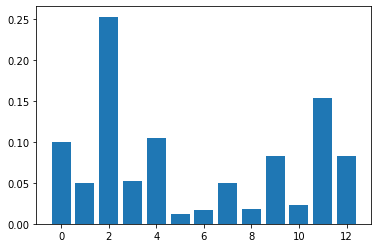

In [12]:
# get importance
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: age, Score: 0.08787
Feature: sex, Score: 0.03888
Feature: cp, Score: 0.13182
Feature: trestbps, Score: 0.06925
Feature: chol, Score: 0.08015
Feature: fbs, Score: 0.01125
Feature: restecg, Score: 0.02190
Feature: thalach, Score: 0.11696
Feature: exang, Score: 0.05816
Feature: oldpeak, Score: 0.10087
Feature: slope, Score: 0.05275
Feature: ca, Score: 0.11509
Feature: thal, Score: 0.11505


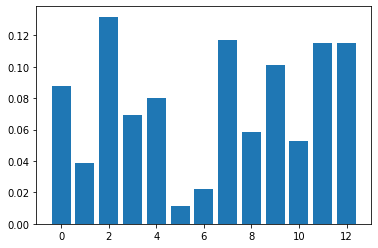

In [13]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Save Model

The decision tree has a higher possibility of overfitting, whereas the random forest reduces the risk of it because it uses multiple decision trees. When we use a decision tree model on a given dataset, the accuracy goes up because it has more splits so that we can easily overfit the data and validate it.
The random forest differs from decision trees in that the former is a graph structure that uses branching methods and provides results in every possible way, whereas the latter combines decision trees, and its result is dependent on all of its decision trees.


So, finally, we are choosing Random Forest as our prediction model.

In [14]:
#saving the model
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(gb, file)

# Summary
Finally, the predictive model was deployed!


The Cardiac Diagnosis Web App has now been developed using the Streamlit Web Framework and the Python programming language. 